#connect to kaggle

In [1]:
! pip install -q kaggle

In [2]:
# This line imports the files module from google.colab, which allows you to upload and download files in Google Colab.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ammarelfeky","key":"2ba0f000944e3f140e03f63deaf3ba16"}'}

In [3]:
!rm /root/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [4]:
# This line creates a directory named kaggle in the home directory (~). The ! at the beginning allows you to run shell commands in the notebook.
! mkdir ~/.kaggle
# This line copies the kaggle.json file you uploaded into the ~/.kaggle directory.
! cp kaggle.json ~/.kaggle

In [5]:
# This line changes the permissions of the kaggle.json file to be read and write by the owner only. This is a requirement of the Kaggle API.
!chmod 600 ~/.kaggle/kaggle.json

#Download dataset

In [6]:
! kaggle datasets download -d pcbreviglieri/pneumonia-xray-images

Dataset URL: https://www.kaggle.com/datasets/pcbreviglieri/pneumonia-xray-images
License(s): Attribution 4.0 International (CC BY 4.0)
100% 1.14G/1.14G [00:19<00:00, 91.3MB/s]
100% 1.14G/1.14G [00:19<00:00, 61.7MB/s]


#Extract files

In [7]:
import zipfile
from_dir = '/content/pneumonia-xray-images.zip'
to_path = '/content/dataset'
z = zipfile.ZipFile(from_dir)
z.extractall(to_path)

In [8]:
import pathlib
train_path = pathlib.Path('/content/dataset/train')
train_path_PNEUMONIA = pathlib.Path('/content/dataset/train/opacity')
train_path_NORMAL = pathlib.Path('/content/dataset/train/normal')

val_path = pathlib.Path('/content/dataset/val')
val_path_PNEUMONIA = pathlib.Path('/content/dataset/val/opacity')
val_path_NORMAL = pathlib.Path('/content/dataset/val/normal')

test_path = pathlib.Path('/content/dataset/test')
test_path_PNEUMONIA = pathlib.Path('/content/dataset/test/opacity')
test_path_NORMAL = pathlib.Path('/content/dataset/test/normal')

#Explore dataset

In [9]:
import os
def listdir_nohidden(path):
    return [file for file in os.listdir(path) if not file.startswith('.')]

def num_files_in_directory(path):
    return len([file for file in os.listdir(path) if not file.startswith('.')])

In [10]:

print("[Train] Number of NORMAL Images: ", num_files_in_directory(train_path_NORMAL))
print("[Train] Number of PNEUMONIA Images: ", num_files_in_directory(train_path_PNEUMONIA))
print("[Train] Number of TOTAL Images: ", num_files_in_directory(train_path_NORMAL) + num_files_in_directory(train_path_PNEUMONIA))
print("**************************************************************************************")

print("[Validation] Number of NORMAL Images: ", num_files_in_directory(val_path_NORMAL))
print("[Validation] Number of PNEUMONIA Images: ", num_files_in_directory(val_path_PNEUMONIA))
print("[Validation] Number of TOTAL Images: ", num_files_in_directory(val_path_NORMAL) + num_files_in_directory(val_path_PNEUMONIA))
print("**************************************************************************************")

print("[Test] Number of NORMAL Images: ", num_files_in_directory(test_path_NORMAL))
print("[Test] Number of PNEUMONIA Images: ", num_files_in_directory(test_path_PNEUMONIA))
print("[Test] Number of TOTAL Images: ", num_files_in_directory(test_path_NORMAL) + num_files_in_directory(test_path_PNEUMONIA))

[Train] Number of NORMAL Images:  1082
[Train] Number of PNEUMONIA Images:  3110
[Train] Number of TOTAL Images:  4192
**************************************************************************************
[Validation] Number of NORMAL Images:  267
[Validation] Number of PNEUMONIA Images:  773
[Validation] Number of TOTAL Images:  1040
**************************************************************************************
[Test] Number of NORMAL Images:  234
[Test] Number of PNEUMONIA Images:  390
[Test] Number of TOTAL Images:  624


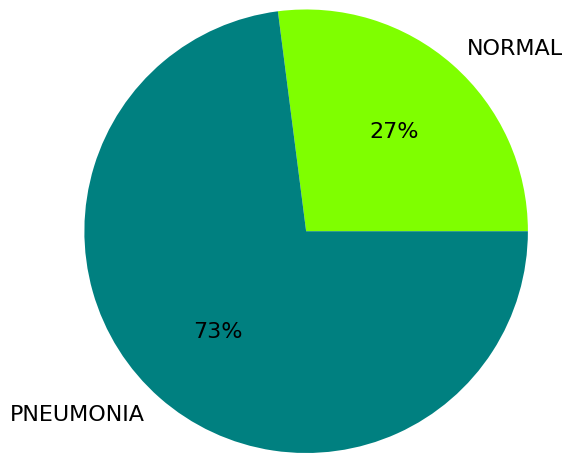

5856


In [11]:
import matplotlib.pyplot as plt
import numpy as np
normalCount = num_files_in_directory(train_path_NORMAL) + num_files_in_directory(val_path_NORMAL) + num_files_in_directory(test_path_NORMAL)
pneumoniaCount = num_files_in_directory(train_path_PNEUMONIA) + num_files_in_directory(val_path_PNEUMONIA) + num_files_in_directory(test_path_PNEUMONIA)
x = np.array([normalCount,pneumoniaCount])
labels = ['NORMAL', 'PNEUMONIA']
colors = {'NORMAL': 'chartreuse','PNEUMONIA': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()
print(normalCount + pneumoniaCount)

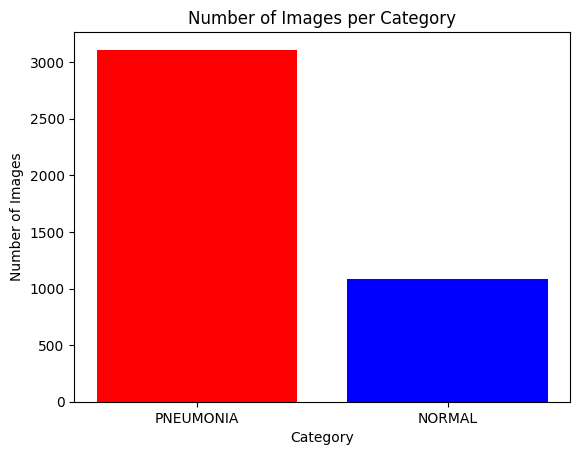

In [12]:
trainCount_Pneumonia = num_files_in_directory(train_path_PNEUMONIA)
trainCount_Normal = num_files_in_directory(train_path_NORMAL)
plt.bar(['PNEUMONIA','NORMAL'], [trainCount_Pneumonia , trainCount_Normal] , color=['red','blue'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.show()

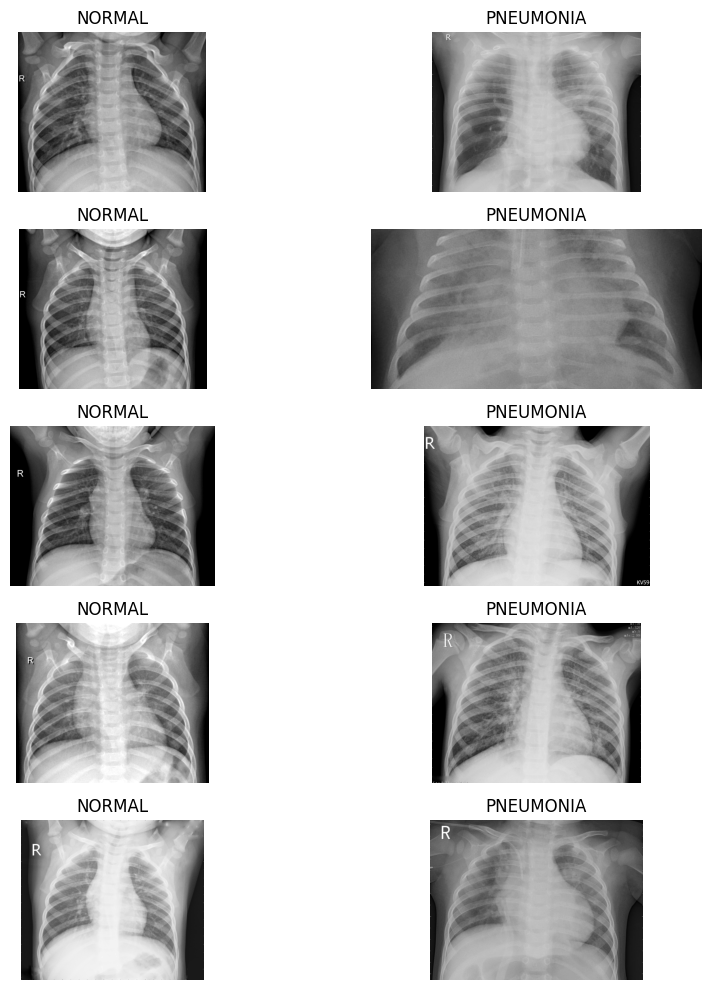

In [13]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# # Specify the path to your training directory
# train_dir = '/path/to/your/train/directory'

# # Get the list of all images in both subdirectories
normal_images = os.listdir(os.path.join(train_path, 'normal'))[:5]
pneumonia_images = os.listdir(os.path.join(train_path, 'opacity'))[:5]

# normal_images = os.listdir(train_path_PNEUMONIA)[:5]
# pneumonia_images = os.listdir(train_path_NORMAL)[:5]
# Create a new figure
plt.figure(figsize=(10, 10))

# Display the first 5 images from the 'normal' subdirectory
for i, image_name in enumerate(normal_images):
    plt.subplot(5, 2, 2*i+1)
    image = Image.open(os.path.join(train_path, 'normal', image_name))
    plt.imshow(image, cmap='gray')
    plt.title('NORMAL')
    plt.axis('off')

# Display the first 5 images from the 'pneumonia' subdirectory
for i, image_name in enumerate(pneumonia_images):
    plt.subplot(5, 2, 2*i+2)
    image = Image.open(os.path.join(train_path, 'opacity', image_name))
    plt.imshow(image, cmap='gray')
    plt.title('PNEUMONIA')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Data pre-processing and data augmentation

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_dataGen = ImageDataGenerator(rescale=1./255)

In [15]:
batch_size = 16
#The dimension of the images we are going to define is 500x500
img_height = 500
img_width = 500
train = train_datagen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
valid = test_dataGen.flow_from_directory(
      val_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      class_mode='binary',
      batch_size=batch_size
      )
test = test_dataGen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='grayscale',
      shuffle=False,
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem
      class_mode='binary',
      batch_size=batch_size
      )


Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


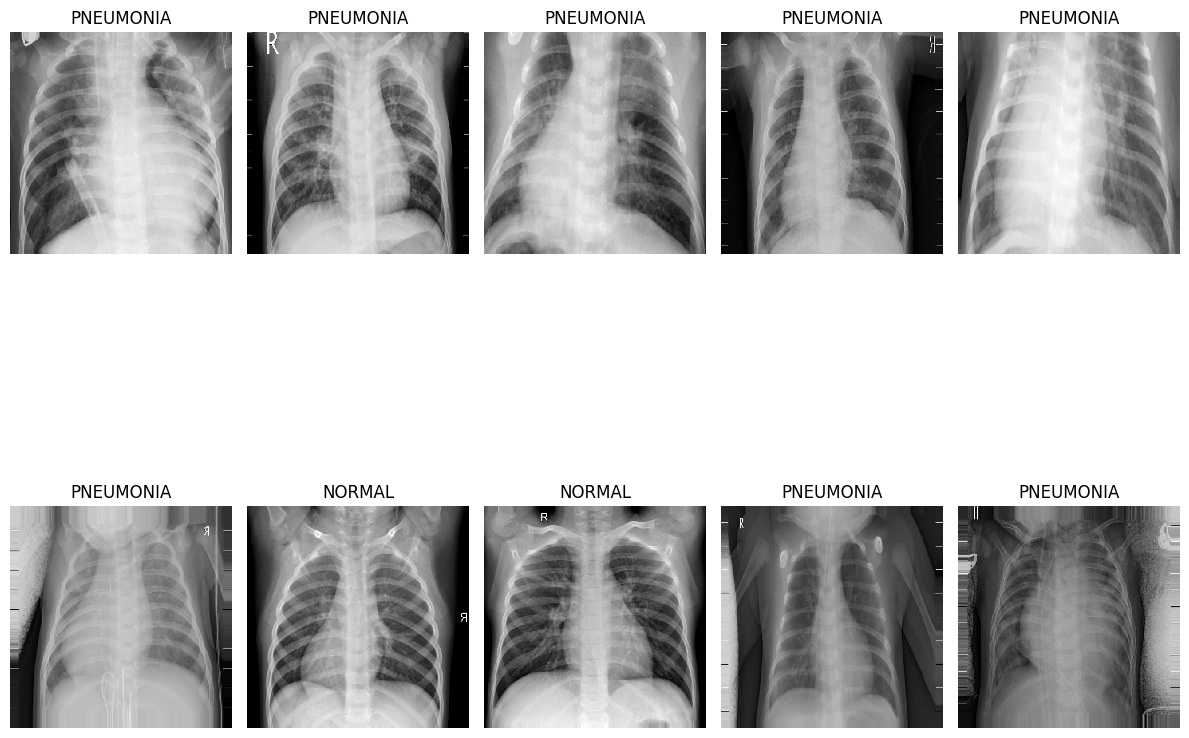

In [16]:
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]
        dic = {0:'NORMAL', 1:'PNEUMONIA'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

#Model

In [17]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense
# from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'relu', units = 64))
model.add(Dense(activation = 'sigmoid', units = 1))

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 32)        0

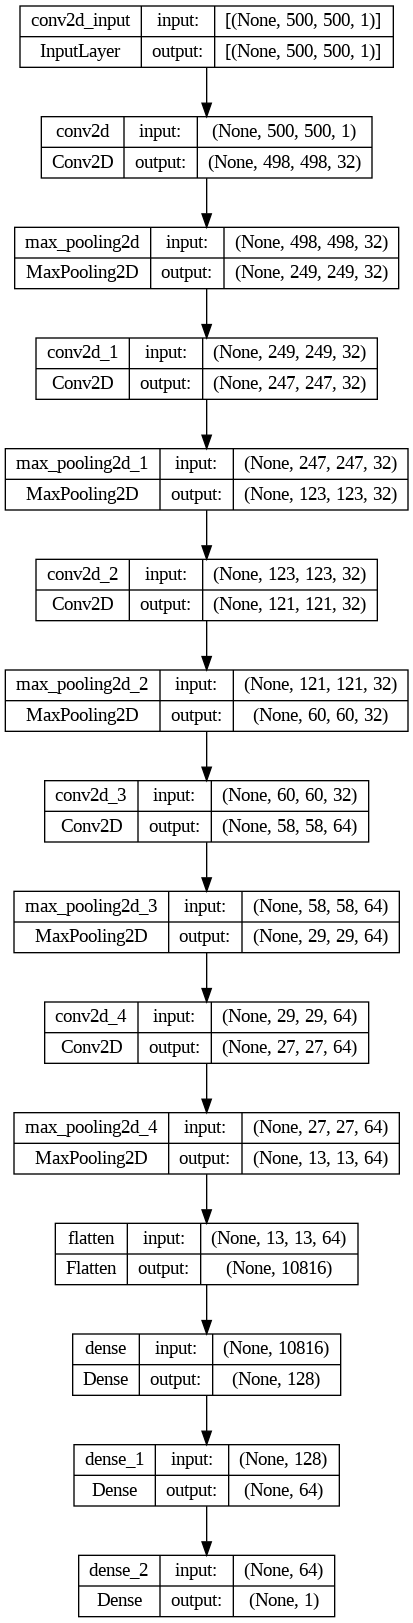

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

# early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
# callbacks_list = [ early, learning_rate_reduction]

In [23]:
import numpy as np

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train.classes),
                                        y = train.classes
                                    )
class_weights = dict(zip(np.unique(train.classes), class_weights))
class_weights

{0: 1.9371534195933457, 1: 0.6739549839228296}

In [24]:
model.fit(train,epochs=25, validation_data=valid, class_weight=class_weights, callbacks=callbacks_list)

Epoch 1/25
262/262 [==============================] - 116s 408ms/step - loss: 0.3995 - accuracy: 0.7994 - val_loss: 0.2223 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 2/25
262/262 [==============================] - 111s 422ms/step - loss: 0.2477 - accuracy: 0.9039 - val_loss: 0.2200 - val_accuracy: 0.9221 - lr: 0.0010
Epoch 3/25
262/262 [==============================] - 109s 417ms/step - loss: 0.2194 - accuracy: 0.9148 - val_loss: 0.3062 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 4/25
262/262 [==============================] - 109s 418ms/step - loss: 0.1863 - accuracy: 0.9282 - val_loss: 0.1458 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 5/25
262/262 [==============================] - 110s 418ms/step - loss: 0.1834 - accuracy: 0.9270 - val_loss: 0.3315 - val_accuracy: 0.8596 - lr: 0.0010
Epoch 6/25
262/262 [==============================] - ETA: 0s - loss: 0.1546 - accuracy: 0.9370
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
262/262 [========================

<Axes: >

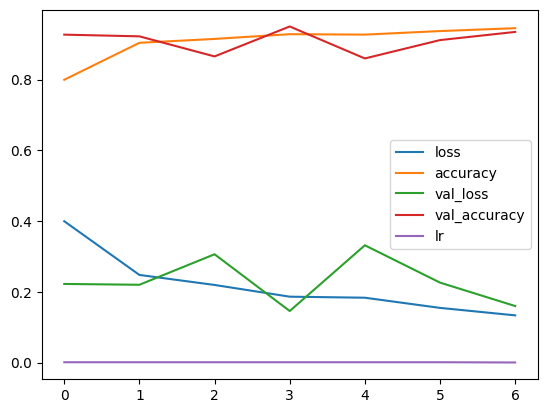

In [25]:
import pandas as pd
pd.DataFrame(model.history.history).plot()

In [27]:
test_accu = model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

39/39 [==============================] - 4s 90ms/step - loss: 0.2694 - accuracy: 0.9103
The testing accuracy is : 91.02563858032227 %


In [26]:
preds = model.predict(test,verbose=1)

39/39 [==============================] - 4s 102ms/step


#save model

In [33]:
import tensorflow as tf
model.save('/content/finalmodel/final_model.keras')

In [37]:
import os
import shutil
directory_path = '/content/finalmodel/'
shutil.make_archive('final_model', 'zip', directory_path)

'/content/final_model.zip'

In [38]:
from google.colab import files
files.download('/content/final_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<Axes: >

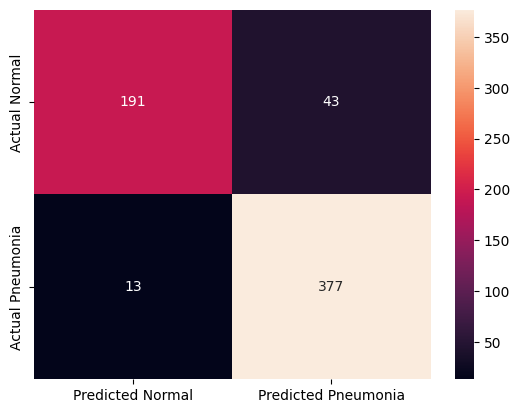

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [30]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.94      0.82      0.87       234
   PNEUMONIA       0.90      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



(624, 500, 500, 1)
(624,)


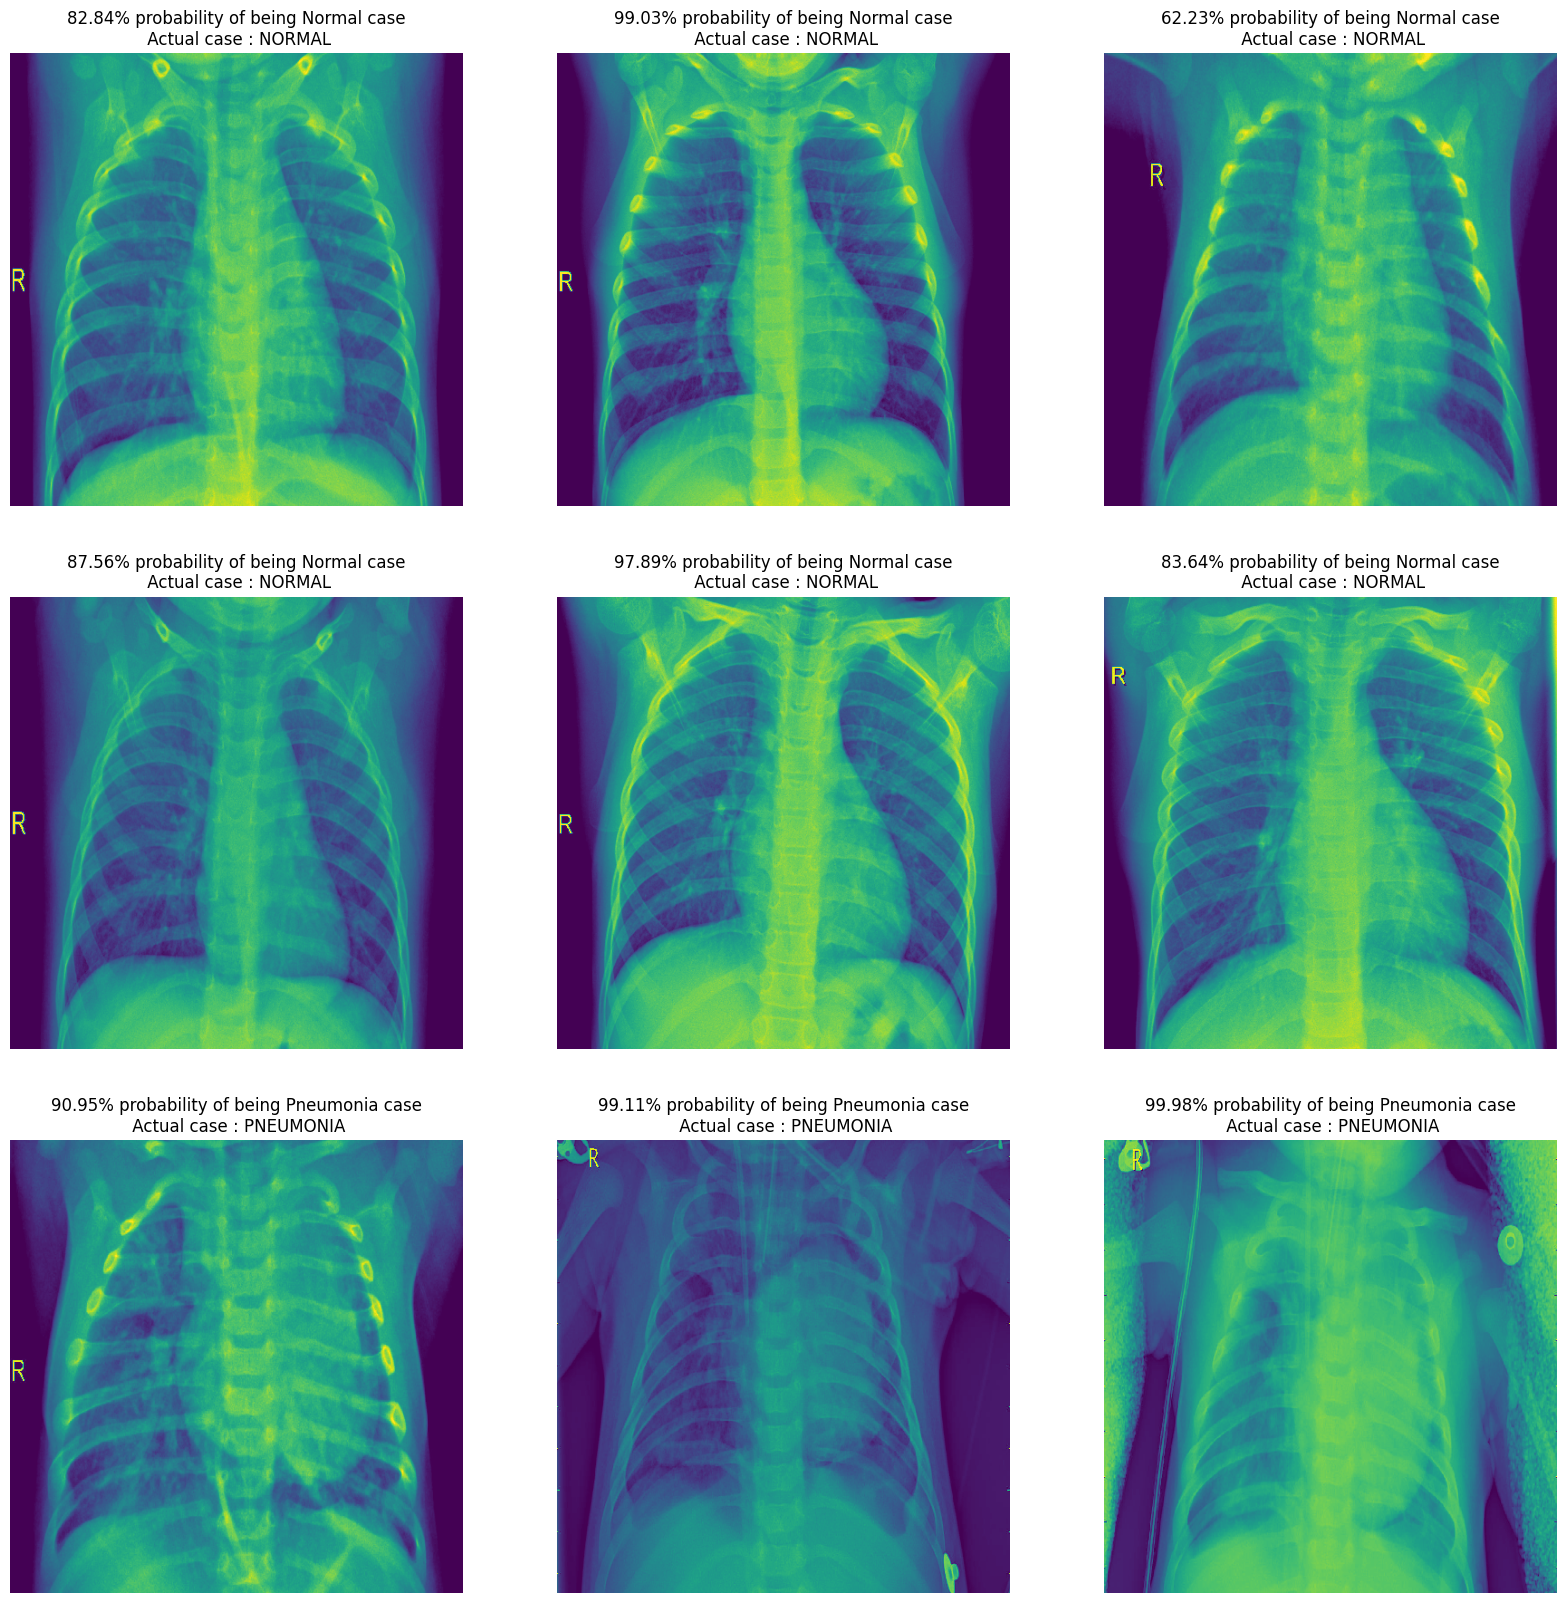

In [31]:
import matplotlib.pyplot as plt

test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)
#this little code above extracts the images from test Data iterator without shuffling the sequence
# x contains image array and y has labels
dic = {0:'NORMAL', 1:'PNEUMONIA'}
plt.figure(figsize=(20,20))
for i in range(0+228, 9+228):
  plt.subplot(3, 3, (i-228)+1)
  if preds[i, 0] >= 0.5:
      out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))


  else:
      out = ('{:.2%} probability of being Normal case'.format(1-preds[i][0]))
  plt.title(out+"\n Actual case : "+ dic.get(y[i]))
  plt.imshow(np.squeeze(x[i]))
  plt.axis('off')
plt.show()

In [42]:
import zipfile
import os
import tensorflow as tf

# Step 1: Extract the zip file
# zip_path = '/content/final_model.zip'
# extract_path = '/content/myModel'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# extracted_files = os.listdir(extract_path)
# print("Extracted files:", extracted_files)

# Step 2: Load the extracted model
# model_path = os.path.join(extract_path, 'model_directory')
model= tf.keras.models.load_model('/content/finalmodel/final_model.keras')


In [43]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 32)        0

1/1 [==============================] - 1s 964ms/step


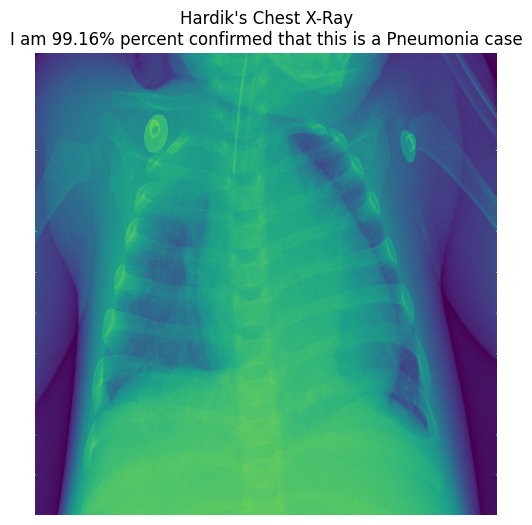

In [45]:
# Testing with my own Chest X-Ray
hardik_path = '/content/person1469_bacteria_3824.jpeg'

from tensorflow.keras.preprocessing import image

hardik_img = image.load_img(hardik_path, target_size=(500, 500),color_mode='grayscale')

# Preprocessing the image
pp_hardik_img = image.img_to_array(hardik_img)
pp_hardik_img = pp_hardik_img/255
pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

#predict
hardik_preds= model.predict(pp_hardik_img)

#print
plt.figure(figsize=(6,6))
plt.axis('off')
if hardik_preds>= 0.5:
    out = ('I am {:.2%} percent confirmed that this is a Pneumonia case'.format(hardik_preds[0][0]))

else:
    out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(1-hardik_preds[0][0]))


plt.title("Hardik's Chest X-Ray\n"+out)
plt.imshow(np.squeeze(pp_hardik_img))
plt.show()

In [46]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.6 MB/s eta 0:00:00


In [49]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2024-06-30 05:02:13--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  21.4MB/s    in 0.6s    

2024-06-30 05:02:14 (21.4 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [50]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [73]:
%%writefile webapp.py
import streamlit as st
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import tensorflow as tf

from tempfile import NamedTemporaryFile
from tensorflow.keras.preprocessing import image

st.set_option('deprecation.showfileUploaderEncoding', False)

@st.cache_resource
def loading_model():
    fp = "/content/finalmodel/final_model.keras"
    model_loader = load_model(fp)
    return model_loader

cnn = loading_model()

st.write("""
# Chest X-Ray Classification (Pneumonia/Normal)
""")

temp = st.file_uploader("Upload X-Ray Image")

buffer = temp
temp_file = NamedTemporaryFile(delete=False)
if buffer:
    temp_file.write(buffer.getvalue())
    st.write(image.load_img(temp_file.name))

if buffer is None:
    st.text("Oops! that doesn't look like an image. Try again.")
else:
    hardik_img = image.load_img(temp_file.name, target_size=(500, 500), color_mode='grayscale')

    # Preprocessing the image
    pp_hardik_img = image.img_to_array(hardik_img)
    pp_hardik_img = pp_hardik_img / 255
    pp_hardik_img = np.expand_dims(pp_hardik_img, axis=0)

    # Predict
    hardik_preds = cnn.predict(pp_hardik_img)
    if hardik_preds >= 0.5:
        out = 'the image has {:.2%} of being Pneumonia case'.format(hardik_preds[0][0])
    else:
        out = 'the image has {:.2%} of being Normal case'.format(1 - hardik_preds[0][0])

    st.success(out)

    image = Image.open(temp)
    st.image(image, use_column_width=True)


Overwriting webapp.py


In [77]:
# Step 1: Install pyngrok if not already installed
# !pip install pyngrok

# Step 2: Import necessary libraries
from pyngrok import ngrok
import os

# Step 3: Authenticate ngrok
# Replace 'YOUR_NGROK_AUTH_TOKEN' with your actual ngrok authtoken
ngrok.set_auth_token("2iaNOpQKWDjmoK6m6g7xeIzxxvq_6AYZNxSnk1AmzeMHZbbv8")

# Step 4: Set up ngrok tunnel
# Open an HTTP tunnel on port 8501 for Streamlit
public_url = ngrok.connect(8080)
print(f"Public URL: {public_url}")

# Step 5: Run the Streamlit app
os.system('streamlit run /content/webapp.py')




Public URL: NgrokTunnel: "https://1f37-34-16-167-67.ngrok-free.app" -> "http://localhost:8080"


2